# Dataset Exploration

In [1]:
import pandas as pd
df1 = pd.read_csv("Travel Company New Clients.csv", sep = ';')
df2 = pd.read_csv("Travel Company Old Clients.csv", sep = ';')
df2

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
677,27,Private Sector/Self Employed,No,450000,7,0,No,No,0
678,25,Private Sector/Self Employed,Yes,1700000,4,0,Yes,No,1
679,26,Government Sector,Yes,500000,5,0,No,No,0
680,29,Private Sector/Self Employed,Yes,1100000,4,1,No,Yes,1


In [2]:
df2.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

# Outliers Check

<AxesSubplot:xlabel='AnnualIncome'>

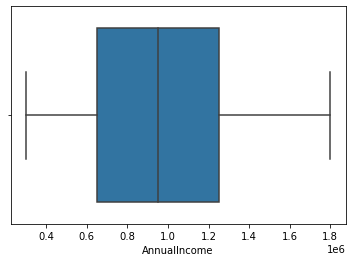

In [3]:
import seaborn as sns
sns.boxplot(x=df2["AnnualIncome"])

# Plot Age and Annual Income

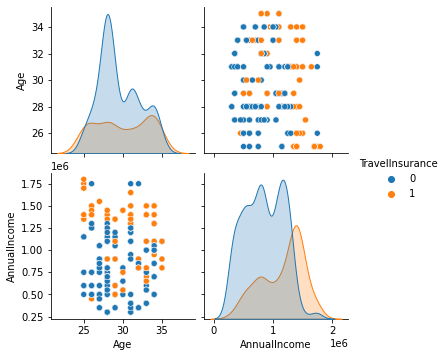

In [4]:
import seaborn as sns
sns.pairplot(df2,vars=['Age', 'AnnualIncome'], hue='TravelInsurance')

# Define Categorial Data to Numerical

In [5]:
df2['Employment Type'] = df2['Employment Type'].astype("category").cat.codes
df2['GraduateOrNot'] = df2['GraduateOrNot'].astype("category").cat.codes
df2['FrequentFlyer'] = df2['FrequentFlyer'].astype("category").cat.codes
df2['EverTravelledAbroad'] = df2['EverTravelledAbroad'].astype("category").cat.codes
df2

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
677,27,1,0,450000,7,0,0,0,0
678,25,1,1,1700000,4,0,1,0,1
679,26,0,1,500000,5,0,0,0,0
680,29,1,1,1100000,4,1,0,1,1


In [6]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [7]:
X

array([[31,  0,  1, ...,  1,  0,  0],
       [31,  1,  1, ...,  0,  0,  0],
       [34,  1,  1, ...,  1,  0,  0],
       ...,
       [26,  0,  1, ...,  0,  0,  0],
       [29,  1,  1, ...,  1,  0,  1],
       [28,  1,  1, ...,  0,  0,  0]], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Defining Model Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=1)

In [10]:
y_pred = rf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

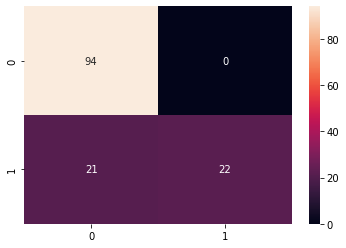

In [12]:
sns.heatmap(cm, annot=True, fmt='d')

# Evaluation

In [13]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
acc *= 100
acc = round(acc, 2)
print("Accuracy Model Random Forest :" , acc)

Accuracy Model Random Forest : 84.67


# Predict New Customer

In [14]:
df1['Employment Type'] = df1['Employment Type'].astype("category").cat.codes
df1['GraduateOrNot'] = df1['GraduateOrNot'].astype("category").cat.codes
df1['FrequentFlyer'] = df1['FrequentFlyer'].astype("category").cat.codes
df1['EverTravelledAbroad'] = df1['EverTravelledAbroad'].astype("category").cat.codes
df1

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,25,1,0,1150000,4,0,0,0
1,34,1,1,1500000,4,1,1,1
2,33,1,1,1500000,3,0,1,1
3,28,1,1,1150000,3,0,0,0
4,33,0,1,400000,5,1,0,0
...,...,...,...,...,...,...,...,...
1298,33,1,1,1500000,4,0,1,1
1299,28,1,1,1750000,5,1,0,1
1300,28,1,1,1150000,6,1,0,0
1301,34,1,1,1000000,6,0,1,1


In [15]:
X_target = df1.values

# Predictions

In [16]:
predicted = rf.predict(X_target)

In [17]:
df1['TravelInsurance'] = predicted

In [18]:
df1

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,25,1,0,1150000,4,0,0,0,0
1,34,1,1,1500000,4,1,1,1,1
2,33,1,1,1500000,3,0,1,1,1
3,28,1,1,1150000,3,0,0,0,0
4,33,0,1,400000,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1298,33,1,1,1500000,4,0,1,1,1
1299,28,1,1,1750000,5,1,0,1,1
1300,28,1,1,1150000,6,1,0,0,0
1301,34,1,1,1000000,6,0,1,1,0


# Travel Insurance Comparison

([<matplotlib.patches.Wedge at 0x20ab426e088>,
 [Text(-0.5382569390286421, 0.9593119761514065, '0'),
  Text(0.5382570288459094, -0.9593119257561505, '1')],
 [Text(-0.29359469401562294, 0.5232610779007671, '66.28%'),
  Text(0.29359474300685967, -0.5232610504124456, '33.72%')])

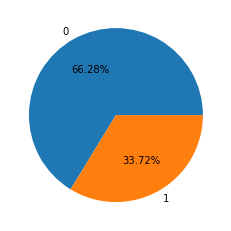

In [19]:
import matplotlib.pyplot as plt
plt.pie(df2['TravelInsurance'].value_counts(),
       labels=df2['TravelInsurance'].value_counts().index,
       autopct='%0.2f%%')

# Plot Age and Annual Income in Prediction

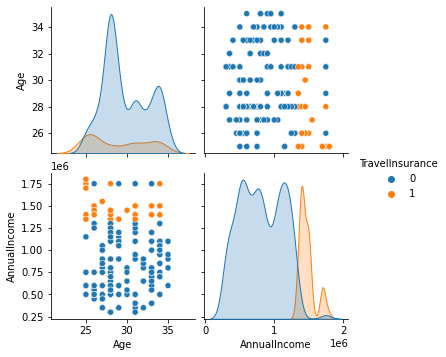

In [20]:
import seaborn as sns
sns.pairplot(df1,vars=['Age', 'AnnualIncome'], hue='TravelInsurance')